# House prices through the Great Recession
The goal of this notebook is to play with some public real estate and stock data and have a cursory glance at the impact of the great recession of the late 2000's on the US housing market. [Wikipedia link](https://en.wikipedia.org/wiki/Great_Recession).

## Imports and definitions

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, date

## List of potentially good raw data sources
[Redfin](https://www.redfin.com/blog/data-center)<br>
[FHFA house price index](https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index.aspx), also [here](https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index-Datasets.aspx)<br>
[US census](https://www.census.gov/topics/housing/data.html) and/or [here](https://www.census.gov/econ/currentdata/)<br>
[Federal Reserve St Louis](https://fred.stlouisfed.org/series/MSPUS), see also [census](https://www.census.gov/construction/nrs/index.html)<br>
[Zillow Home Listings and Sales](https://www.zillow.com/research/data/), see also [here](https://www.zillow.com/research/home-sales-methodology-7733/)

## 1 - Redfin data
The real estate brokerage firm Redfin provides useful data and data visualizations online at [this website](https://www.redfin.com/blog/data-center). The page allows to select a region or multiple regions and a metric of interest (such as median house price). One can then download a plot directly, or the data in csv format (choosing "crosstab" the option).

A fun data mining project would be to automize the selection and download of the data from the site (i.e. removing the step of manually making a selection on the Redfin web page). 

Example plot of median housing price in various Los Angeles areas:

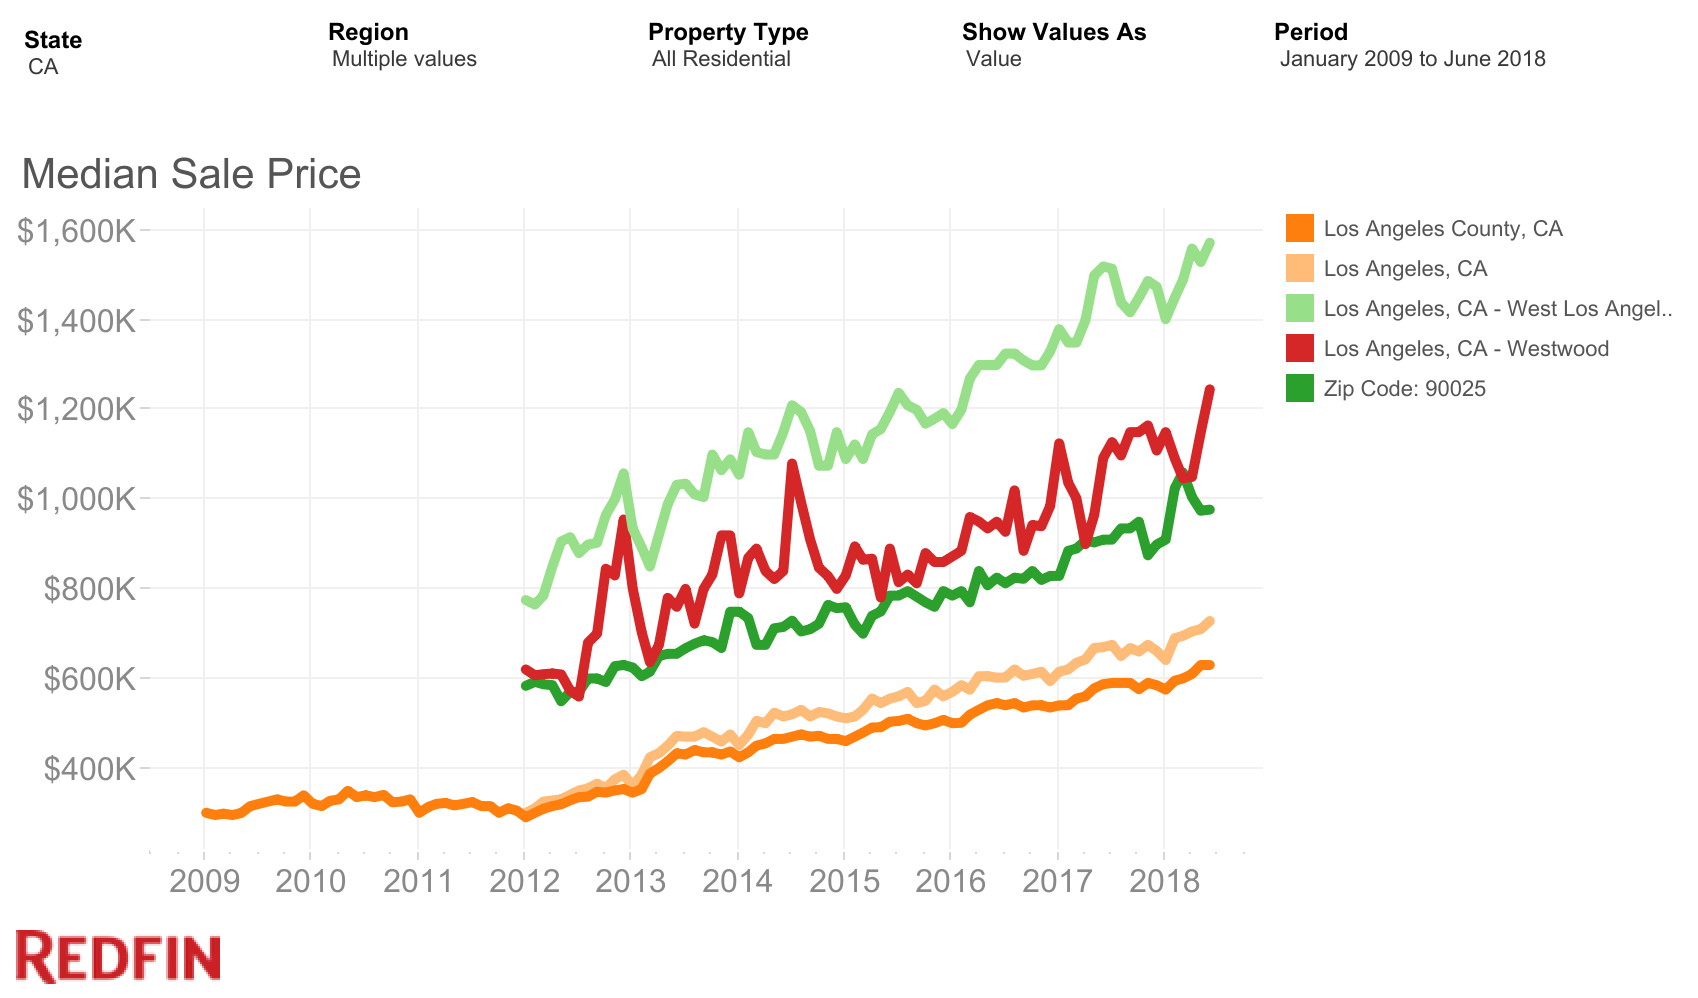

In [6]:
from IPython.display import Image
fig = Image(filename=('../Figures/Median_Sale_Price_LA.png'))
fig

I downloaded the data itself for Los Angeles in the files med_sale_price_crosstab_LA_LAcityonly.csv and med_sale_price_crosstab_LA_3regions.csv. This is only the median price as a function of time for a few regions, a very small data set. Moreover, it isn't actually downloaded in csv format (despite the file extension). If I want a full database with multiple statistics as a function of time, the website doesn't even give the option to download csv. The closest is probably the Tableau Workbook option.

A useful project might be to write a short routine to read in this file into a dataframe

In [5]:
#df_LA = pd.read_csv('../Data/med_sale_price_crosstab_LA_3regions.csv')

Unfortunately, the Redfin data do not go far enough back to clearly show the drop in housing prices of the beginning of the recession. See for instance [this CoreLogic report](https://www.corelogic.com/downloadable-docs/corelogic-peak-totrough-final-030118.pdf) or [this ATTOM Data Solutions report](https://www.attomdata.com/news/market-trends/home-sales-prices/q1-2018-u-s-home-sales-report/).
<b>Because of this, let's look at other sources first.</b>

## 2 - Zillow
I downloaded median house prices from Zillow ([source](https://www.zillow.com/research/data/), [methodology](https://www.zillow.com/research/home-sales-methodology-7733/)). Let's have a look.

#### Data by city:

In [7]:
df_cities_zillow = pd.read_csv('../Data/Sale_Prices_City.csv')

In [8]:
df_cities_zillow.head()

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
0,6181.0,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,...,559800.0,545500.0,542600.0,547500.0,562800.0,574800.0,583400.0,584500.0,582900.0,568300.0
1,12447.0,Los Angeles,California,2,511200.0,480100.0,461500.0,451000.0,434200.0,419600.0,...,651200.0,652900.0,670900.0,678900.0,700000.0,707600.0,716800.0,703500.0,696600.0,699900.0
2,17426.0,Chicago,Illinois,3,326500.0,315200.0,290300.0,278800.0,272100.0,268000.0,...,265000.0,270000.0,272200.0,277200.0,281100.0,289700.0,304900.0,303700.0,296700.0,279300.0
3,13271.0,Philadelphia,Pennsylvania,4,109100.0,109000.0,110500.0,110000.0,107800.0,111000.0,...,143600.0,145300.0,148000.0,148100.0,154300.0,150600.0,150400.0,146000.0,149400.0,148900.0
4,40326.0,Phoenix,Arizona,5,222800.0,215000.0,207200.0,196700.0,185800.0,175300.0,...,221600.0,223600.0,226700.0,230700.0,236700.0,240100.0,240200.0,238100.0,234500.0,235600.0


#### To match better with the dataframes for the upcoming data sets, let's say we want  the Zillow dataframe to have date as the index, and cities as the columns:

In [35]:
def transform_zillow_df(df):
    df_altform = df.set_index(['RegionName'])
    df_altform.drop(['SizeRank', 'RegionID'], axis=1, inplace=True)
    if 'StateName' in df.columns:
        df_altform.drop('StateName', axis=1, inplace=True)
    df_altform = df_altform.T
    df_altform['Date'] = pd.to_datetime(df_altform.index, format='%Y-%m')
    cols = list(df_altform.columns)
    cols = cols[-1:] + cols[:-1]
    df_altform = df_altform[cols]
    return df_altform

In [36]:
df_cities_zillow_altform = transform_zillow_df(df_cities_zillow)
df_cities_zillow_altform.head()

RegionName,Date,New York,Los Angeles,Chicago,Philadelphia,Phoenix,Las Vegas,San Antonio,San Diego,Dallas,...,Indian Rocks Beach,Melissa,Powell,Crandall,Sparta,Sparta,North Wales,Trophy Club,Flagler Beach,Quinton
2008-03,2008-03-01,NaN,511200.0,326500.0,109100.0,222800.0,243600.0,NaN,420900.0,NaN,...,NaN,NaN,NaN,NaN,478900.0,NaN,279200.0,NaN,NaN,NaN
2008-04,2008-04-01,NaN,480100.0,315200.0,109000.0,215000.0,238400.0,NaN,409500.0,NaN,...,NaN,NaN,NaN,NaN,433300.0,NaN,272300.0,NaN,NaN,NaN
2008-05,2008-05-01,NaN,461500.0,290300.0,110500.0,207200.0,235000.0,NaN,398000.0,NaN,...,NaN,NaN,NaN,NaN,408500.0,NaN,257100.0,NaN,NaN,NaN
2008-06,2008-06-01,NaN,451000.0,278800.0,110000.0,196700.0,231000.0,NaN,378000.0,NaN,...,NaN,NaN,NaN,NaN,381000.0,NaN,253000.0,NaN,NaN,NaN
2008-07,2008-07-01,NaN,434200.0,272100.0,107800.0,185800.0,220800.0,NaN,368600.0,NaN,...,NaN,NaN,NaN,NaN,388900.0,NaN,244300.0,NaN,NaN,NaN


can also convert the actual column names to datetime type:

#### Data nationwide and by metropolitan area:

In [37]:
df_metroUS_zillow = pd.read_csv('../Data/Sale_Prices_Msa.csv')

In [38]:
df_metroUS_zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Columns: 127 entries, RegionID to 2018-06
dtypes: float64(124), int64(2), object(1)
memory usage: 90.4+ KB


In [42]:
df_metroUS_zillow_altform = transform_zillow_df(df_metroUS_zillow)
df_metroUS_zillow_altform.head()

RegionName,Date,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL",...,"Des Moines, IA","Youngstown, OH","Augusta, GA","Scranton, PA","Harrisburg, PA","Melbourne, FL","Chattanooga, TN","Spokane, WA","Provo, UT","Lancaster, PA"
2008-03,2008-03-01,188000.0,NaN,474800.0,254200.0,NaN,212000.0,NaN,355200.0,258800.0,...,144400.0,71200.0,118400.0,115800.0,164700.0,173900.0,120700.0,174700.0,NaN,NaN
2008-04,2008-04-01,184700.0,NaN,463400.0,251600.0,NaN,211000.0,NaN,345400.0,249000.0,...,146600.0,71000.0,113300.0,109700.0,159700.0,163300.0,118800.0,172700.0,NaN,NaN
2008-05,2008-05-01,180600.0,NaN,447100.0,238600.0,NaN,207600.0,NaN,329900.0,237800.0,...,144400.0,66200.0,112700.0,102400.0,155800.0,157300.0,119400.0,171000.0,NaN,NaN
2008-06,2008-06-01,176900.0,NaN,435600.0,227200.0,NaN,199100.0,NaN,317300.0,228600.0,...,142900.0,69300.0,107600.0,107200.0,154300.0,152200.0,117700.0,172400.0,NaN,NaN
2008-07,2008-07-01,174900.0,NaN,422300.0,224200.0,NaN,195400.0,NaN,312000.0,224500.0,...,139700.0,70300.0,106600.0,104400.0,156300.0,152800.0,119300.0,171000.0,NaN,NaN


#### Make plot:

In [82]:
idx_LAmet = 3 #read off from above
idx_SFmet = df_metroUS_zillow_altform.columns.get_loc('San Francisco, CA')
print('index for SF: {0:d}. index for LA: {1:d}'.format(idx_SFmet, idx_LAmet))

index for SF: 12. index for LA: 3


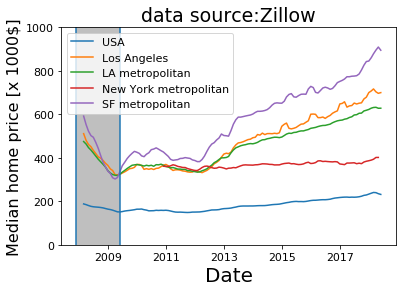

In [86]:
plt.rc('font', size=11)
plt.plot(df_metroUS_zillow_altform['Date'], \
         df_metroUS_zillow_altform['United States']/1000,
        label = 'USA')
plt.plot(df_cities_zillow_altform['Date'], \
         df_cities_zillow_altform['Los Angeles']/1000,
        label = 'Los Angeles')
plt.plot(df_metroUS_zillow_altform['Date'], \
         df_metroUS_zillow_altform.iloc[:,idx_LAmet]/1000,
        label = 'LA metropolitan')
plt.plot(df_metroUS_zillow_altform['Date'], \
         df_metroUS_zillow_altform['New York, NY']/1000,
        label = 'New York metropolitan')
plt.plot(df_metroUS_zillow_altform['Date'], \
         df_metroUS_zillow_altform.iloc[:,idx_SFmet]/1000,
        label = 'SF metropolitan')
plt.axvline(datetime(2007, 12, 1, 0,0,0))
plt.axvline(datetime(2009, 6, 1, 0,0,0))
plt.fill_between([datetime(2007, 12, 1, 0,0,0), datetime(2009, 6, 1, 0,0,0)], 0, 10000, facecolor='grey', alpha=0.5)
plt.ylim(0,1000)
plt.ylabel(r'Median home price [x 1000$]', fontsize=16)
plt.xlabel(r'Date', fontsize=20)
plt.title(r'data source:Zillow', fontsize=19)
plt.legend()

## 3 - Federal Reserve St Louis
The St Louis Fed has median house price data that go much further back.<br>
[source](https://fred.stlouisfed.org/series/MSPUS)

#### Nationwide data:

In [54]:
df_US_fedres = pd.read_csv('../Data/MSPUS.csv')

In [55]:
df_US_fedres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 2 columns):
DATE     221 non-null object
MSPUS    221 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.5+ KB


In [56]:
df_US_fedres['DATE'] = pd.to_datetime(df_US_fedres['DATE'],format='%Y-%m-%d')

In [57]:
df_US_fedres.head()

,DATE,MSPUS
0,1963-01-01,17800.0
1,1963-04-01,18000.0
2,1963-07-01,17900.0
3,1963-10-01,18500.0
4,1964-01-01,18500.0


#### Data in West census region:

In [58]:
df_West_fedres = pd.read_csv('../Data/MSPW.csv')
df_West_fedres['DATE'] = pd.to_datetime(df_West_fedres['DATE'],format='%Y-%m-%d')

In [59]:
df_West_fedres.head()

,DATE,MSPW
0,1963-01-01,18000.0
1,1963-04-01,18900.0
2,1963-07-01,19000.0
3,1963-10-01,19500.0
4,1964-01-01,19600.0


In [61]:
df_fedres = pd.merge(df_US_fedres, df_West_fedres, how = 'outer', on = 'DATE')

In [62]:
#df_fedres[['MSPUS', 'MSPW']].isnull().sum(axis=0)
df_fedres.head()

,DATE,MSPUS,MSPW
0,1963-01-01,17800.0,18000.0
1,1963-04-01,18000.0,18900.0
2,1963-07-01,17900.0,19000.0
3,1963-10-01,18500.0,19500.0
4,1964-01-01,18500.0,19600.0


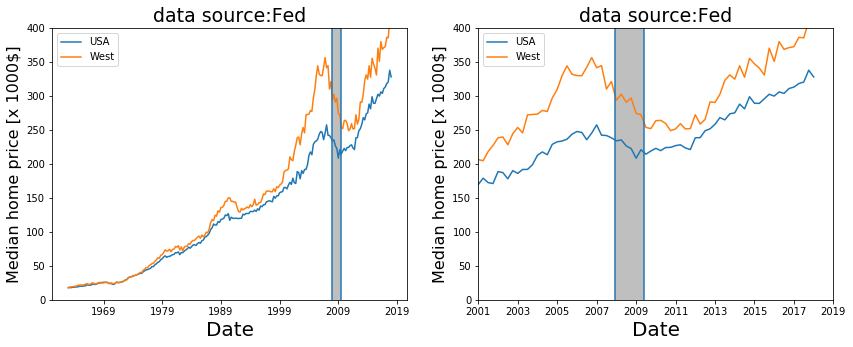

In [66]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))
ax1.plot(df_fedres.DATE, \
         df_fedres.MSPUS/1000,
        label = 'USA')
ax1.plot(df_fedres.DATE, \
         df_fedres.MSPW/1000,
        label = 'West')
ax1.axvline(datetime(2007, 12, 1, 0,0,0))
ax1.axvline(datetime(2009, 6, 1, 0,0,0))
ax1.fill_between([datetime(2007, 12, 1, 0,0,0), datetime(2009, 6, 1, 0,0,0)], 0, 10000, facecolor='grey', alpha=0.5)
ax1.set_ylim(0,400)
ax1.set_ylabel(r'Median home price [x 1000$]', fontsize=16)
ax1.set_xlabel(r'Date', fontsize=20)
ax1.set_title(r'data source:Fed', fontsize=19)
ax1.legend()

ax2.plot(df_fedres.DATE, \
         df_fedres.MSPUS/1000,
        label = 'USA')
ax2.plot(df_fedres.DATE, \
         df_fedres.MSPW/1000,
        label = 'West')
ax2.axvline(datetime(2007, 12, 1, 0,0,0))
ax2.axvline(datetime(2009, 6, 1, 0,0,0))
ax2.fill_between([datetime(2007, 12, 1, 0,0,0), datetime(2009, 6, 1, 0,0,0)], 0, 10000, facecolor='grey', alpha=0.5)
ax2.set_ylim(0,400)
ax2.set_xlim(datetime(2001,1,1,0,0,0), datetime(2019,1,1,0,0,0))
ax2.set_ylabel(r'Median home price [x 1000$]', fontsize=16)
ax2.set_xlabel(r'Date', fontsize=20)
ax2.set_title(r'data source:Fed', fontsize=19)
ax2.legend()

## 4 - Comparison with stock data:
Download historical S&P 500 data from [investing.com page](https://www.investing.com/indices/us-spx-500-historical-data) (need to create a free account before downloading):

In [67]:
df_sp500 = pd.read_csv('../../Stock_Data/Data/SP500HistoricalData.csv')

In [34]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 9 columns):
Date            236 non-null object
Price           236 non-null object
Open            236 non-null object
High            236 non-null object
Low             236 non-null object
Vol.            236 non-null object
Change %        236 non-null object
Date_clean      236 non-null datetime64[ns]
Date_clean_2    236 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(7)
memory usage: 16.7+ KB


#### convert date strings to Datetime objects:

In [68]:
df_sp500['Date_clean'] = pd.to_datetime(df_sp500['Date'], format = '%b %y')

#### convert price strings to floats:

In [69]:
df_sp500['Price_clean'] = df_sp500['Price'].str.replace(',', '').astype(float)

#### Have a look:

In [70]:
df_sp500.head()

,Date,Price,Open,High,Low,Vol.,Change %,Date_clean,Price_clean
0,Aug 18,"2,896.74","2,819.48","2,898.34","2,794.82",-,2.86%,2018-08-01,2896.74
1,Jul 18,"2,816.29","2,704.95","2,848.03","2,698.95",-,3.60%,2018-07-01,2816.29
2,Jun 18,"2,718.37","2,718.70","2,791.47","2,691.99",-,0.48%,2018-06-01,2718.37
3,May 18,"2,705.27","2,643.64","2,742.24","2,594.62",-,2.16%,2018-05-01,2705.27
4,Apr 18,"2,648.05","2,633.45","2,717.49","2,553.80",-,0.27%,2018-04-01,2648.05


#### Now quick plot:

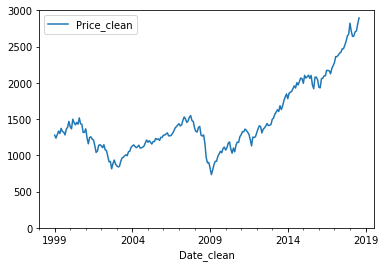

In [77]:
df_sp500.plot(kind='line', x='Date_clean', y ='Price_clean')
ax = plt.gca()
_ = ax.set_ylim(0,3000)

## 5 - Final plot: housing price data with S&P500

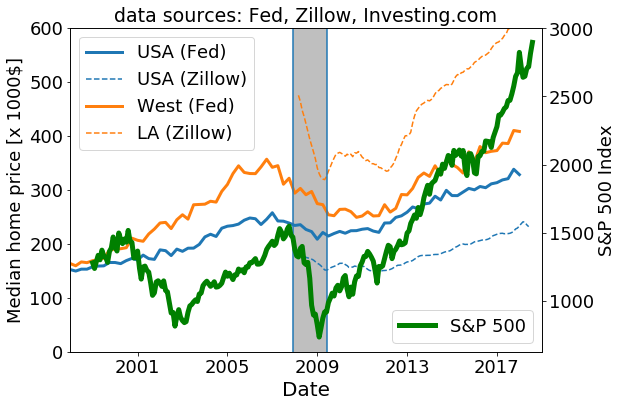

In [87]:
plt.rc('font', size=18)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(1,1,1)

pl1, = ax1.plot(df_fedres.DATE, \
         df_fedres.MSPUS/1000,
        label = 'USA (Fed)', linewidth=3)
plt.plot(df_metroUS_zillow_altform['Date'], \
         df_metroUS_zillow_altform['United States']/1000,
        label = 'USA (Zillow)', linestyle='dashed', color=pl1.get_color())
pl2, = ax1.plot(df_fedres.DATE, \
         df_fedres.MSPW/1000,
        label = 'West (Fed)', linewidth=3)
plt.plot(df_metroUS_zillow_altform['Date'], \
         df_metroUS_zillow_altform.iloc[:,idx_LAmet]/1000,
        label = 'LA (Zillow)', linestyle='dashed', color=pl2.get_color())

ax1.axvline(datetime(2007, 12, 1, 0,0,0))
ax1.axvline(datetime(2009, 6, 1, 0,0,0))
ax1.fill_between([datetime(2007, 12, 1, 0,0,0), datetime(2009, 6, 1, 0,0,0)], 0, 10000, facecolor='grey', alpha=0.5)
ax1.set_ylim(0,600)
ax1.set_xlim(date(1998,1,1),date(2019,1,1))
ax1.set_ylabel(r'Median home price [x 1000$]')
ax1.set_xlabel(r'Date', fontsize=20)
ax1.set_title(r'data sources: Fed, Zillow, Investing.com', fontsize=19)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel(r'S&P 500 Index')
ax2.plot(df_sp500.Date_clean, df_sp500.Price_clean, label=r'S&P 500', color='g', linewidth=5)
ax2.legend(loc='lower right')

plt.tight_layout()